In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('fertlizer.csv')
df

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,20,83,26,Clayey,rice,90,49,36,Urea
1,25,84,32,Loamy,rice,66,59,36,Urea
2,33,64,50,Loamy,Wheat,41,0,0,Urea
3,34,65,54,Loamy,Wheat,38,0,0,Urea
4,38,72,51,Loamy,Wheat,39,0,0,Urea
...,...,...,...,...,...,...,...,...,...
547,12,95,42,Sandy,orange,11,14,5,10-10-10
548,12,95,42,Sandy,orange,11,14,5,10-10-10
549,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10
550,27,80,31,Clayey,kidneybeans,19,21,6,10-10-10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [4]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,28.630435,64.557971,42.840580,28.521739,10.144928,21.115942
std,5.088082,11.880236,11.507275,29.121989,13.456956,14.920514
min,0.000000,50.000000,25.000000,0.000000,0.000000,0.000000
25%,26.000000,54.000000,33.000000,10.000000,0.000000,8.000000
50%,29.000000,62.000000,41.000000,15.000000,0.000000,20.000000
75%,32.000000,68.000000,51.000000,37.000000,18.000000,36.000000
max,38.000000,95.000000,65.000000,126.000000,59.000000,54.000000


In [5]:
df['Fertilizer'].value_counts()

Fertilizer
Urea                  108
DAP                   104
28-28                  68
20-20                  56
14-35-14               56
TSP                    28
17-17-17               28
10-26-26               28
15-15-15               16
14-14-14               16
10-10-10               16
Superphosphate         12
Potassium sulfate.     12
Potassium chloride      4
Name: count, dtype: int64

In [6]:
df['Crop_Type'].value_counts()

Crop_Type
Cotton         64
Sugarcane      52
Millets        44
Pulses         40
Paddy          40
Wheat          36
pomegranate    32
Ground Nuts    28
Barley         28
orange         28
Oil seeds      28
Tobacco        28
Maize          24
rice           24
watermelon     20
kidneybeans    20
coffee         16
Name: count, dtype: int64

In [7]:
df['Soil_Type'].value_counts()

Soil_Type
Loamy     192
Sandy     108
Clayey    100
Red        76
Black      76
Name: count, dtype: int64

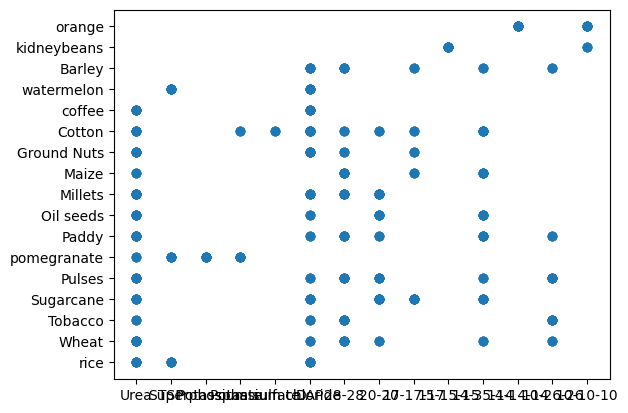

In [8]:
plt.scatter(df['Fertilizer'],df['Crop_Type'])

<Axes: xlabel='Crop_Type', ylabel='Fertilizer'>

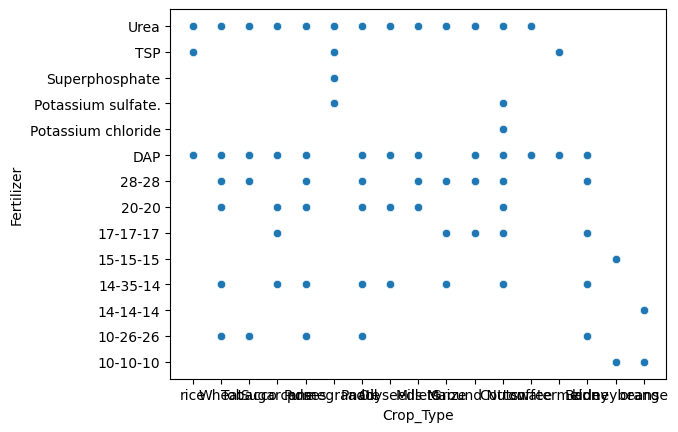

In [9]:
sns.scatterplot(x = df['Crop_Type'],y = df['Fertilizer'])

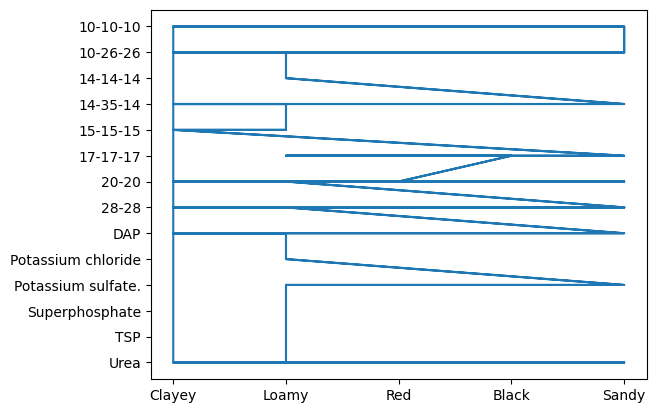

In [10]:
plt.plot(df['Soil_Type'],df['Fertilizer'])

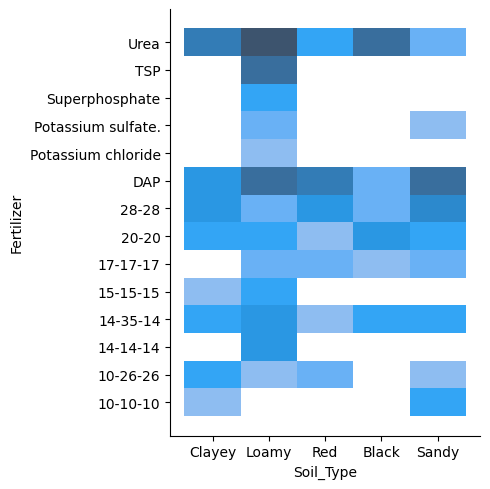

In [11]:
sns.displot(x = df['Soil_Type'], y = df['Fertilizer'])

<Axes: xlabel='Humidity', ylabel='Fertilizer'>

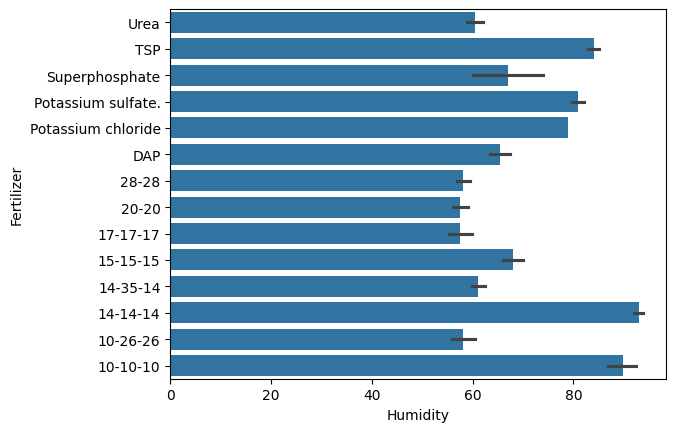

In [12]:
sns.barplot(x = df['Humidity'],y = df['Fertilizer'])

<Axes: xlabel='Temparature', ylabel='Fertilizer'>

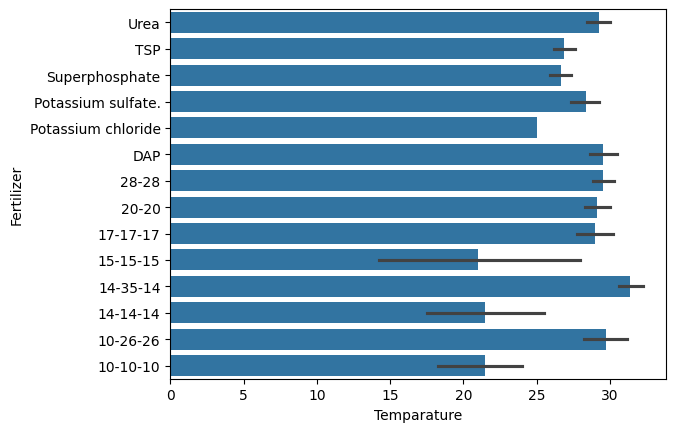

In [13]:
sns.barplot(x = df['Temparature'], y = df['Fertilizer'])

<Axes: xlabel='Moisture', ylabel='Fertilizer'>

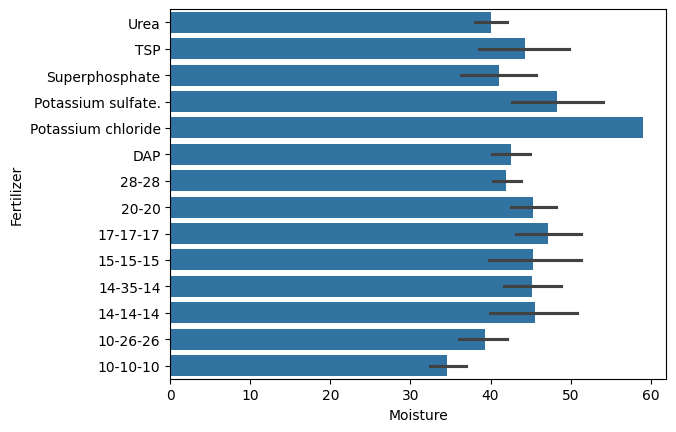

In [14]:
sns.barplot(x = df['Moisture'], y = df['Fertilizer'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# df['Fertilizer'] = le.fit_transform(df['Fertilizer'])
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])
df['Crop_Type'] = le.fit_transform(df['Crop_Type'])

In [17]:
columns = ['Temparature','Humidity','Moisture','Soil_Type','Crop_Type','Nitrogen','Potassium','Phosphorous']
train = df[columns]
test = df['Fertilizer']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9279279279279279
                    precision    recall  f1-score   support

          10-10-10       1.00      0.80      0.89         5
          10-26-26       1.00      1.00      1.00         9
          14-14-14       1.00      1.00      1.00         4
          14-35-14       1.00      1.00      1.00         8
          15-15-15       0.67      1.00      0.80         2
          17-17-17       1.00      1.00      1.00         4
             20-20       1.00      1.00      1.00         6
             28-28       1.00      1.00      1.00        26
               DAP       0.82      0.88      0.85        16
Potassium sulfate.       1.00      1.00      1.00         1
    Superphosphate       0.33      1.00      0.50         1
               TSP       0.67      0.80      0.73         5
              Urea       1.00      0.83      0.91        24

          accuracy                           0.93       111
         macro avg       0.88      0.95      0.90  

In [22]:
x_test

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous
547,12,95,42,4,13,11,14,5
81,34,65,64,0,1,24,0,20
140,20,83,26,1,15,90,49,36
79,30,60,47,4,3,22,0,21
272,29,58,52,2,10,13,0,36
...,...,...,...,...,...,...,...,...
499,30,60,63,3,1,9,9,29
218,26,66,30,2,11,80,30,25
176,34,65,38,1,6,39,0,0
384,25,50,39,4,0,21,0,19


In [28]:
# 'Temparature','Humidity','Moisture','Soil_Type','Crop_Type','Nitrogen','Potassium','Phosphorous'
temp = NaiveBayes.predict([[20,83,26,0,12,70,36,76]])
print(temp[0])

DAP


d:\PROJECT\app\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [20]:
predicted_values = le.inverse_transform(predicted_values)


ValueError: y contains previously unseen labels: ['10-10-10' '10-26-26' '14-14-14' '14-35-14' '15-15-15' '17-17-17' '20-20'
 '28-28' 'DAP' 'Potassium sulfate.' 'Superphosphate' 'TSP' 'Urea']

In [ ]:
predicted_values

array(['Barley', 'Pulses', 'Sugarcane', 'Pulses', 'Sugarcane', 'Pulses',
       'Maize', 'Maize', 'Pulses', 'Pulses', 'orange', 'coffee', 'Pulses',
       'kidneybeans', 'Sugarcane', 'Paddy', 'Cotton', 'orange', 'Pulses',
       'Wheat', 'kidneybeans', 'orange', 'Cotton', 'Maize', 'Pulses',
       'Pulses', 'Pulses', 'Paddy', 'Cotton', 'orange', 'Ground Nuts',
       'kidneybeans', 'orange', 'Paddy', 'Pulses', 'orange', 'Paddy',
       'Millets', 'orange', 'Pulses', 'Sugarcane', 'Ground Nuts',
       'coffee', 'orange', 'coffee', 'Pulses', 'orange', 'Sugarcane',
       'Barley', 'Sugarcane', 'orange', 'Pulses', 'Oil seeds', 'Pulses',
       'Pulses', 'Millets', 'Cotton', 'Sugarcane', 'Sugarcane', 'Paddy',
       'Ground Nuts', 'Barley', 'Sugarcane', 'Sugarcane', 'Sugarcane',
       'Barley', 'Pulses', 'orange', 'Cotton', 'Sugarcane', 'orange',
       'Sugarcane', 'Pulses', 'Pulses', 'Maize', 'Maize', 'Millets',
       'Pulses', 'Oil seeds', 'orange', 'Oil seeds', 'Pulses', 'Pulses',
  

In [ ]:
y_test

547     0
81      7
140    13
79      7
272     8
       ..
499     3
218    13
176    13
384     7
18     13
Name: Fertilizer, Length: 111, dtype: int32

In [ ]:
y_test = le.inverse_transform(y_test)

In [ ]:
y_test

array(['Barley', 'Pulses', 'orange', 'Pulses', 'Sugarcane', 'Pulses',
       'Maize', 'Maize', 'Pulses', 'Pulses', 'orange', 'orange', 'Pulses',
       'kidneybeans', 'Sugarcane', 'Paddy', 'Cotton', 'orange', 'Pulses',
       'Wheat', 'Sugarcane', 'orange', 'Cotton', 'Maize', 'Pulses',
       'Pulses', 'Pulses', 'Paddy', 'Cotton', 'orange', 'Ground Nuts',
       'kidneybeans', 'orange', 'Paddy', 'Pulses', 'orange', 'Paddy',
       'Millets', 'orange', 'Pulses', 'Sugarcane', 'Ground Nuts',
       'coffee', 'orange', 'kidneybeans', 'Pulses', 'orange', 'Sugarcane',
       'Barley', 'Sugarcane', 'orange', 'Pulses', 'Oil seeds', 'Pulses',
       'Pulses', 'Millets', 'Cotton', 'Sugarcane', 'Sugarcane', 'Paddy',
       'Ground Nuts', 'Barley', 'Sugarcane', 'Sugarcane', 'Sugarcane',
       'Barley', 'Pulses', 'orange', 'Cotton', 'Sugarcane', 'orange',
       'Sugarcane', 'Pulses', 'Pulses', 'Maize', 'Maize', 'Barley',
       'Pulses', 'Oil seeds', 'orange', 'Oil seeds', 'Pulses', 'Pulses',
   

In [ ]:
cnt1 = 0
cnt2 = 0

for i in range(len(y_test)):
    if predicted_values[i] == y_test[i]:
        cnt1 += 1
    cnt2 += 1

print(cnt1,cnt2)

103 111


In [ ]:
cnt1/cnt2

0.9279279279279279